In this jupyter notebook, I will construct word clouds to find out what are the the most popular nouns from posts in NUSWhispers's website (https://www.nuswhispers.com). If you are not interested in the code, this will be at most be a  **1 minute read**.

The data was scraped using a Python command line application that I build, the Github repository of the code for the application can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper. The data can be found at https://github.com/yaofeng-wang/NUSWhispers_scraper/tree/master/output. If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com . 

In the following cells, I will refer to each post in NUSWhispers as a 'Whisper'. If you are not interested in the code,
feel free to skip the 'Data pre-processing' section that will follow immediately and proceed to the 'Construct Wordcloud' 
section.

### Data pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

df53000to53999 = pd.read_excel("./posts53000to53999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df54000to54999 = pd.read_excel("./posts54000to54999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df55000to55999 = pd.read_excel("./posts55000to55999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df56000to56999 = pd.read_excel("./posts56000to56999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df57000to57999 = pd.read_excel("./posts57000to57999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df58000to58999 = pd.read_excel("./posts58000to58999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df59000to59999 = pd.read_excel("./posts59000to59999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df60000to60999 = pd.read_excel("./posts60000to60999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df61000to61999 = pd.read_excel("./posts61000to61999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df62000to62999 = pd.read_excel("./posts62000to62999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df63000to63999 = pd.read_excel("./posts63000to63999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df64000to64999 = pd.read_excel("./posts64000to64999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df65000to65999 = pd.read_excel("./posts65000to65999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df66000to66999 = pd.read_excel("./posts66000to66999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])
df67000to67999 = pd.read_excel("./posts67000to67999.xlsx",
    names=['index','categories','text','num_likes','num_comments','post_age','num_favourites'])

df = pd.concat([df53000to53999, df54000to54999, df55000to55999, df56000to56999, df57000to57999, df58000to58999, 
                df59000to59999, df60000to60999, df61000to61999, df62000to62999, df63000to63999, df64000to64999, 
                df65000to65999, df66000to66999, df67000to67999], axis=0)

# https://github.com/pemagrg1/Text-Pre-Processing-in-Python/blob/master/contractions.py
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:
# Convert text to lower case
# e.g. "HeLlO" becomes "hello"
text = [sentence.lower() for sentence in df['text'].values]

# Contraction
# e.g. "I'll" becomes "I will"
#      "let's" becomes "let us"
all_contractions = '|'.join(contractions_dict.keys())
contractions_pattern = re.compile(f'({all_contractions})')
text = [contractions_pattern.sub(lambda x: contractions_dict.get(x.group(0)), 
                         sentence) for sentence in text]

# Extract textual information from html anchor elements 
# e.g. '<a href="/#!tag/59956">#59956</a>' becomes '#59956'
#      '<a href="/#!tag/ridgeviewbestview">#ridgeviewbestview</a>' becomes '#ridgeviewbestview'
pattern = re.compile(r'(<a href="/#!tag/\d*">)(#\d*)(</a>)')
text = [pattern.sub(lambda x: x.group(2), sentence) for sentence in text]

# Remove html anchor elements that does not problem relevant textual information
pattern = re.compile(r'(<a href=".*">)(.*)(</a>)')
text = [pattern.sub("", sentence) for sentence in text]

# Lemmatization with POS Tag
# https://stackoverflow.com/questions/32957895/wordnetlemmatizer-not-returning-the-right-lemma-unless-pos-is-explicit-python
def process_pos_tag(tag):
    tag = tag[0].lower()
    if tag in ["a", "n", "v", "r"]:
        return tag
    return "n"

def lemmatize_sentence(sentence):
    return ' '.join([lemmatizer.lemmatize(word, process_pos_tag(tag)) for word, tag in nltk.pos_tag(nltk.word_tokenize(sentence))])

lemmatizer = WordNetLemmatizer()
text = [lemmatize_sentence(sentence) for sentence in text] 

# === No limit ====
# Tokenize
tokenizer = RegexpTokenizer('\w+')
word_tokens = [word for sentence in text for word in tokenizer.tokenize(sentence)]

# Remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = [word for word in word_tokens if word not in stop_words]

# Remove punctuations
from string import punctuation
word_tokens = [word for word in word_tokens if word not in punctuation]

# Get all the nouns
# https://stackoverflow.com/questions/33587667/extracting-all-nouns-from-a-text-file-using-nltk
is_noun = lambda pos: pos[:2] == 'NN'
word_tokens = [word for (word, pos) in nltk.pos_tag(word_tokens) if is_noun(pos)]

# === Limit at most one word per post====
# Tokenize with limit
tokenizer = RegexpTokenizer('\w+')
word_tokens_with_limit = [word for sentence in text for word in set(tokenizer.tokenize(sentence))]

# Remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens_with_limit = [word for word in word_tokens_with_limit if word not in stop_words]

# Remove punctuations
word_tokens_with_limit = [word for word in word_tokens_with_limit if word not in punctuation]

# https://stackoverflow.com/questions/33587667/extracting-all-nouns-from-a-text-file-using-nltk
# Get all the nouns
is_noun = lambda pos: pos[:2] == 'NN'
word_tokens_with_limit = [word for (word, pos) in nltk.pos_tag(word_tokens_with_limit) if is_noun(pos)]

### Construct Wordcloud

The Wordcloud below, with the white background, shows the top 20 most common words.

The Wordcloud below, with the black background, shows the top 20 most common words with a word limit for every post, such 
that each post can only contribute 1 count for each word that occurs in the post.

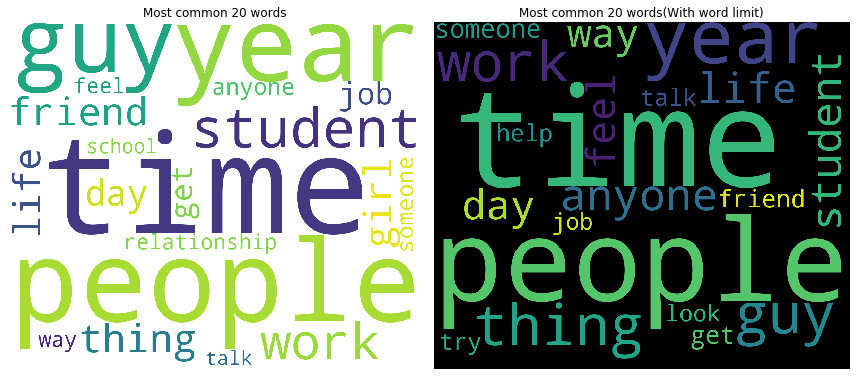

In [6]:
word_tokens_frequency_dict = {k: v for (k, v) in Counter(word_tokens).most_common(20)}
word_tokens_with_limit_frequency_dict = {k: v for (k, v) in Counter(word_tokens_with_limit).most_common(20)}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(12)

wordcloud = WordCloud(max_font_size=None,
                     background_color='white',
                     collocations=False,
                     width=1200,
                     height=1000).generate_from_frequencies(word_tokens_frequency_dict)
ax1.imshow(wordcloud)
ax1.set_title('Most common 20 words')
ax1.axis('off')

wordcloud = WordCloud(max_font_size=None,
                     background_color='black',
                     collocations=False,
                     width=1200,
                     height=1000).generate_from_frequencies(word_tokens_with_limit_frequency_dict)
ax2.imshow(wordcloud)
ax2.set_title('Most common 20 words(With word limit)')
ax2.axis('off')

plt.tight_layout()
plt.show()

In [10]:
fig.set_figheight(10)
fig.set_figwidth(12)

wordcloud = WordCloud(max_font_size=None,
                     background_color='white',
                     collocations=False,
                     width=1200,
                     height=1000).generate_from_frequencies(word_tokens_frequency_dict)
ax1.imshow(wordcloud)
ax1.set_title('Most common 20 words')
ax1.axis('off')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

It's interesting to see that nouns such as 'time', 'people', 'guy' are the most popular nouns, whether or not we impose
the word limit.

Let's see the words in the left Word cloud, in order descending order of occurence.

In [420]:
Counter(word_tokens).most_common(20)

[('time', 757),
 ('people', 663),
 ('student', 605),
 ('year', 540),
 ('guy', 531),
 ('work', 441),
 ('thing', 427),
 ('life', 368),
 ('friend', 363),
 ('girl', 360),
 ('way', 312),
 ('job', 308),
 ('relationship', 301),
 ('get', 290),
 ('someone', 286),
 ('day', 268),
 ('anyone', 263),
 ('feel', 262),
 ('help', 254),
 ('school', 247)]

Let's see the words in the right Word cloud, in order descending order of occurence.

In [421]:
Counter(word_tokens_with_limit).most_common(20)

[('time', 440),
 ('people', 386),
 ('year', 362),
 ('student', 330),
 ('thing', 296),
 ('work', 282),
 ('guy', 262),
 ('anyone', 243),
 ('life', 238),
 ('way', 236),
 ('get', 222),
 ('help', 221),
 ('someone', 215),
 ('friend', 201),
 ('day', 194),
 ('girl', 192),
 ('feel', 183),
 ('job', 182),
 ('look', 174),
 ('relationship', 169)]

Words that occurs in the left Word cloud, but not in the right Word cloud

In [422]:
set(k for k,v in Counter(nouns).most_common(20)) - set(k for k,v in Counter(nouns_with_limit).most_common(20))

{'school'}

Words that occurs in the right Word cloud, but not in the left Word cloud

In [423]:
set(k for k,v in Counter(nouns_with_limit).most_common(20)) - set(k for k,v in Counter(nouns).most_common(20))


{'look'}

Let's see the change in the word counts before and after we impose the word limit.

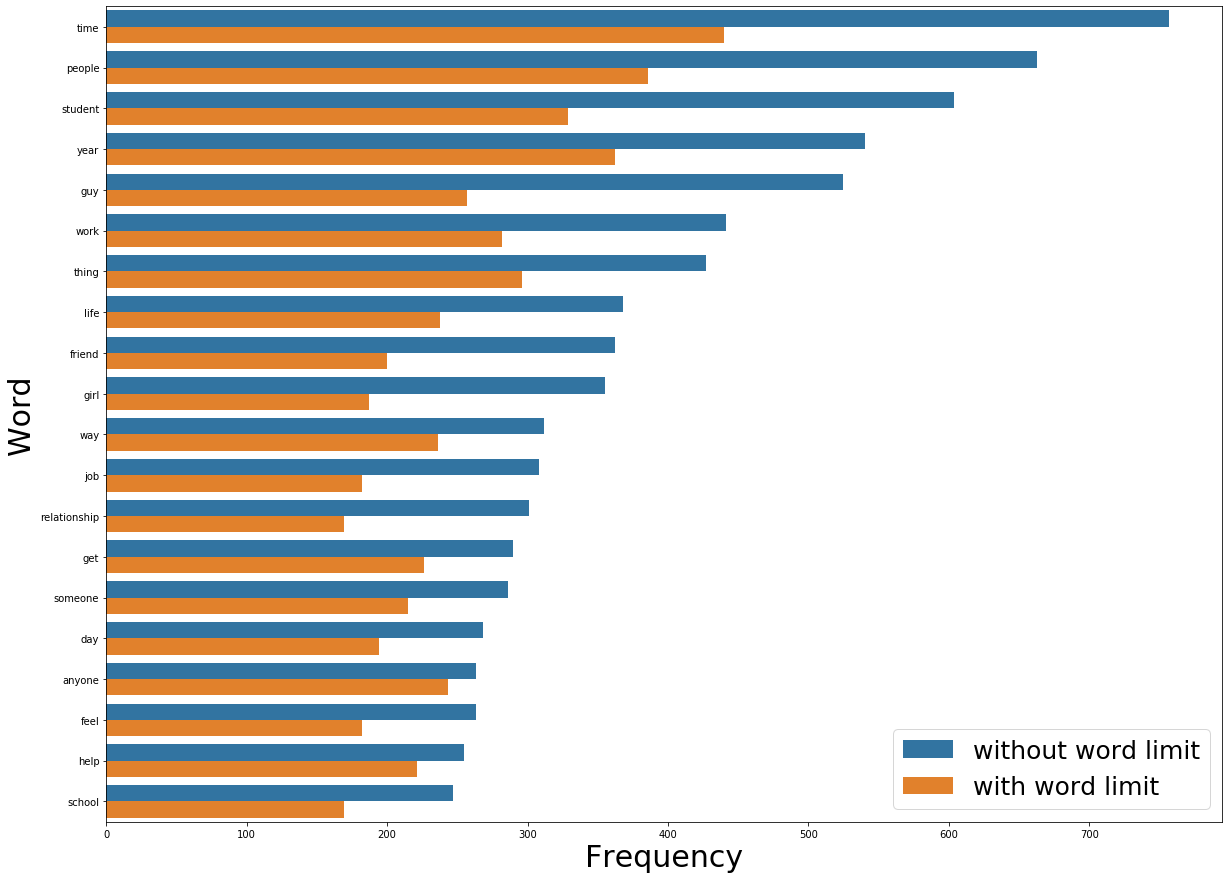

In [457]:
df1 = pd.DataFrame(nouns_frequency_dict.items(), columns=['word', 'frequency'])
nouns_new_frequency = {k: Counter(nouns_with_limit)[k] for k,v in nouns_frequency_dict.items()}
df2 = pd.DataFrame(nouns_new_frequency.items(), columns=['word', 'frequency'])
df1['cat'] = 'without word limit'
df2['cat'] = 'with word limit'
df3 = pd.concat([df1,df2],axis=0)


import seaborn as sns
plt.figure(figsize=(20, 15))
b = sns.barplot(x='frequency', y='word', hue='cat', data=df3)
b.set_xlabel("Frequency",fontsize=30)
b.set_ylabel("Word",fontsize=30)
b.tick_params(labelsize=10)

plt.legend(loc='lower right',prop={'size':25})

Thank you for looking through this jupyter notebook! Once again If you have any suggestion/criticism, please contact me at yaofeng96@gmail.com. Have a good day :) (Last update: 12-Aug-2019)